# II. Exploratory Data Analysis

In [ ]:
df_sales = pd.read_csv("cleaned_data.csv", index_col=0)

## 1. Data Overview and Descriptive Statistics

### Overview

In [ ]:
df_sales.head()

,DimGenderId,DimItemId,ItemNo2,StyleID,Style,Color,Size,Gender,Category,SUB Category,...,Quality,Origin Country,WHSSalesPriceDKK,RRSalesPriceDKK,OrderHeaderNumber,OrderLineNumber,Quantity,Amount,Discount,Cost
DimPostingDateId,,,,,,,,,,,,,,,,,,,,,
2022-03-12,2,347900,F15404308_CLR000021,F15404308,Hoys pants 6528,Black,XL,WOMENSWEAR,Trousers,Trousers,...,Woven,China,315.0,800.0,103099,20001,1.0,294.63,17.71,152.91
2022-03-12,2,347900,F15404308_CLR000021,F15404308,Hoys pants 6528,Black,XL,WOMENSWEAR,Trousers,Trousers,...,Woven,China,315.0,800.0,103106,20002,2.0,589.26,35.34,305.80
2022-03-12,1,778,M00012003_CLR000508,M00012003,Kronos o-n ss 273,White mel,S,MENSWEAR,Tops,Crew neck,...,Jersey,Turkey,90.0,250.0,103035,20002,1.0,78.12,0.00,42.41
2022-03-12,2,348547,F19123672_CLR000021,F19123672,Majan ss shirt 9942,Black,L,WOMENSWEAR,Shirts,Shirts,...,Woven,China,195.0,500.0,IN0001122,60002,2.0,379.45,0.00,147.84
2022-03-12,2,348547,F19123672_CLR000021,F19123672,Majan ss shirt 9942,Black,L,WOMENSWEAR,Shirts,Shirts,...,Woven,China,195.0,500.0,103113,40003,2.0,379.45,0.00,162.08


### Volumetry 

In [ ]:
print("Dataset size: " + str(df_sales.shape))
# We have 3 ladder of items: The style, it is the design of an item. The style with a specific color is called a product. The style x color x size is called a SKU.
print("Number of styles: " + str(df_sales['StyleID'].nunique()))
print("Number of products: " + str(df_sales['ItemNo2'].nunique()))
print("Number of SKUs: " + str(df_sales['DimItemId'].nunique()))

Dataset size: (818375, 21)
Number of styles: 322
Number of products: 700
Number of SKUs: 4359


### Data Types

In [ ]:
df_sales.dtypes

DimGenderId            int64
DimItemId              int64
ItemNo2               object
StyleID               object
Style                 object
Color                 object
Size                  object
Gender                object
Category              object
SUB Category          object
SUB Category2         object
Quality               object
Origin Country        object
WHSSalesPriceDKK     float64
RRSalesPriceDKK      float64
OrderHeaderNumber     object
OrderLineNumber        int64
Quantity             float64
Amount               float64
Discount             float64
Cost                 float64
dtype: object

In [ ]:
df_sales.index = pd.to_datetime(df_sales.index, format="%Y-%m-%d")

### Description

In [ ]:
df_sales.describe(include="float")

,WHSSalesPriceDKK,RRSalesPriceDKK,Quantity,Amount,Discount,Cost
count,818375.000000,818375.000000,818375.000000,818375.000000,818375.000000,818375.000000
mean,234.737225,603.471367,1.872136,441.772587,50.959565,178.263226
std,144.077196,360.547892,4.430286,815.981699,259.153296,339.761034
min,0.000000,0.000000,-1.000000,-477.380000,-477.380000,-453.360000
25%,110.000000,300.000000,1.000000,176.090000,0.000000,61.700000
50%,195.000000,500.000000,1.000000,307.950000,13.570000,123.830000
75%,320.000000,800.000000,2.000000,500.000000,36.560000,187.910000
max,1480.000000,3700.000000,1500.000000,215758.560000,52976.000000,75360.000000


In [ ]:
df_sales.describe(include="object")

,ItemNo2,StyleID,Style,Color,Size,Gender,Category,SUB Category,SUB Category2,Quality,Origin Country,OrderHeaderNumber
count,818375,818375,818375,818375,818375,818375,818375,818375,818375,818375,818375,818375
unique,700,322,323,176,68,3,18,30,5,7,7,108656
top,M00012003_CLR000023,M00012003,Kronos o-n ss 273,Black,M,WOMENSWEAR,Tops,Crew neck,Short sleeve,Jersey,China,IN0149693
freq,18564,76833,76833,229953,182660,416289,377830,335886,274536,432931,397313,716


### Report

In [ ]:
# Generate the report
profile = ProfileReport(df_sales, title="Sales of Basic Product")

# Save the report to .html
profile.to_file("BasicSales.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

KeyboardInterrupt: 

## 2. Feature Assessment and Visualization

#### Sales Pattern

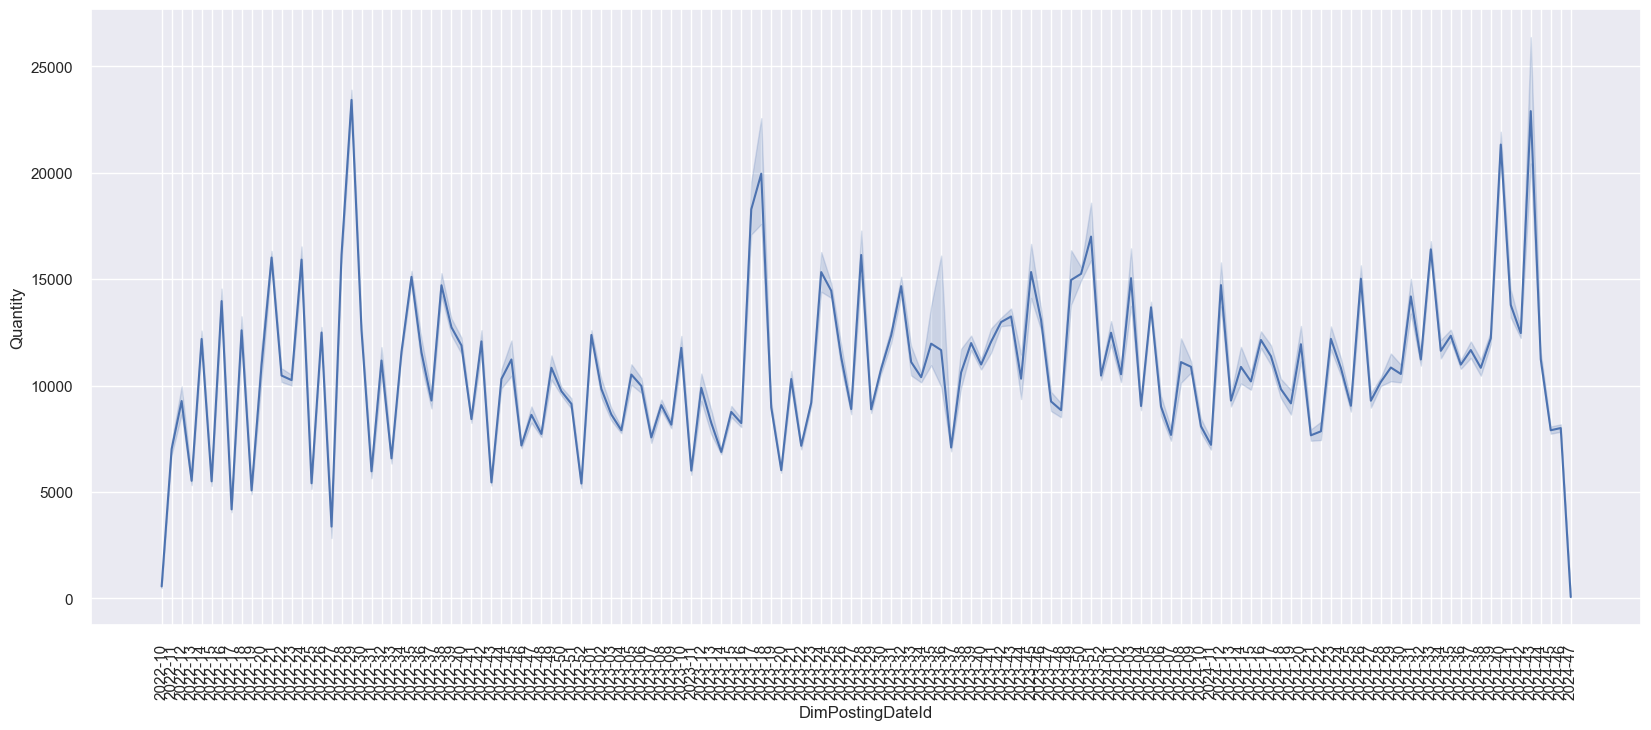

In [ ]:
sns.set(rc={'figure.figsize': (20,8)})
ax = sns.lineplot(data=df_sales,y="Quantity", x=df_sales.index.strftime("%Y-%W"), estimator="sum")
ax.tick_params(axis="x", rotation=90)

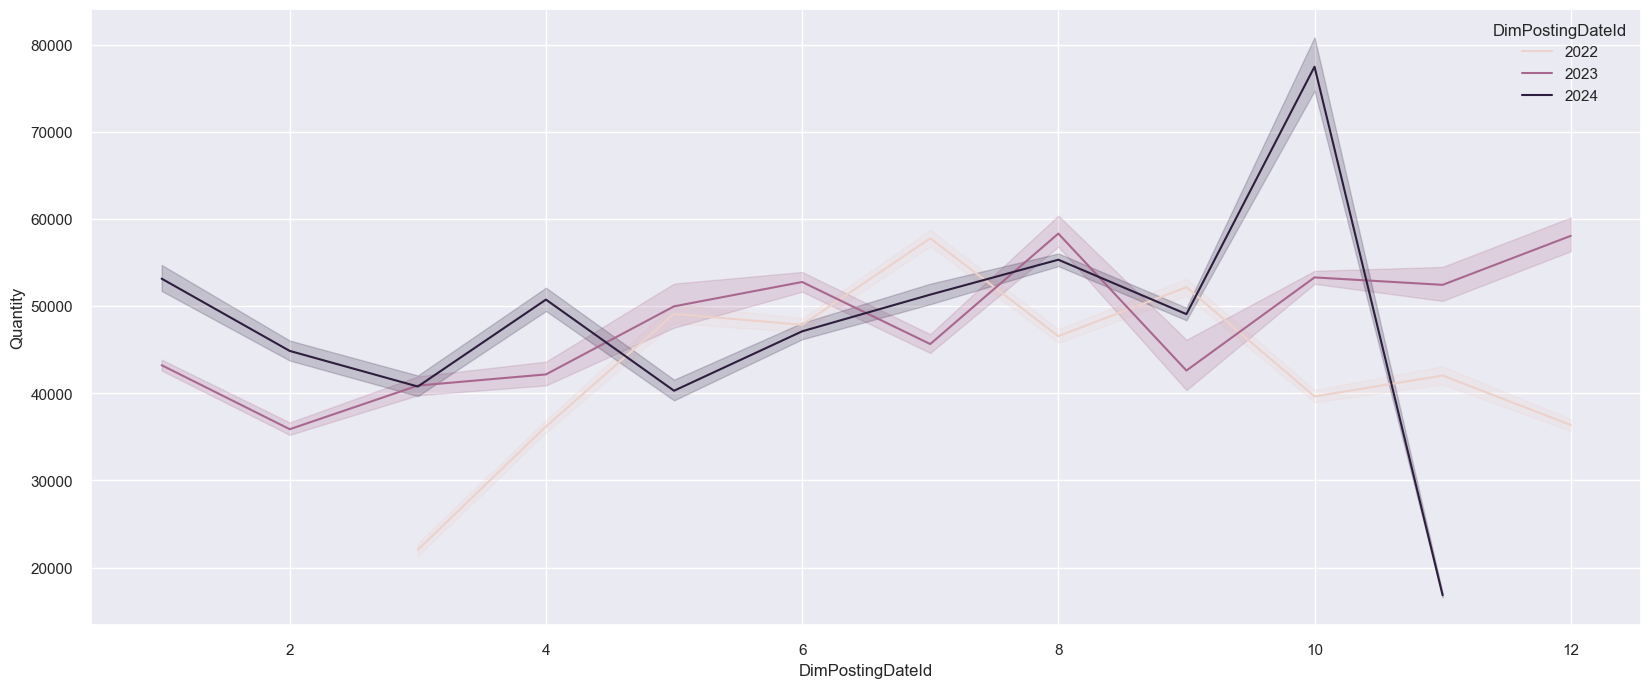

In [ ]:
sns.set(rc={'figure.figsize': (20,8)})
ax = sns.lineplot(data=df_sales,y="Quantity", x=df_sales.index.month, estimator="sum", hue=df_sales.index.year)
ax.tick_params(axis="x", rotation=0)


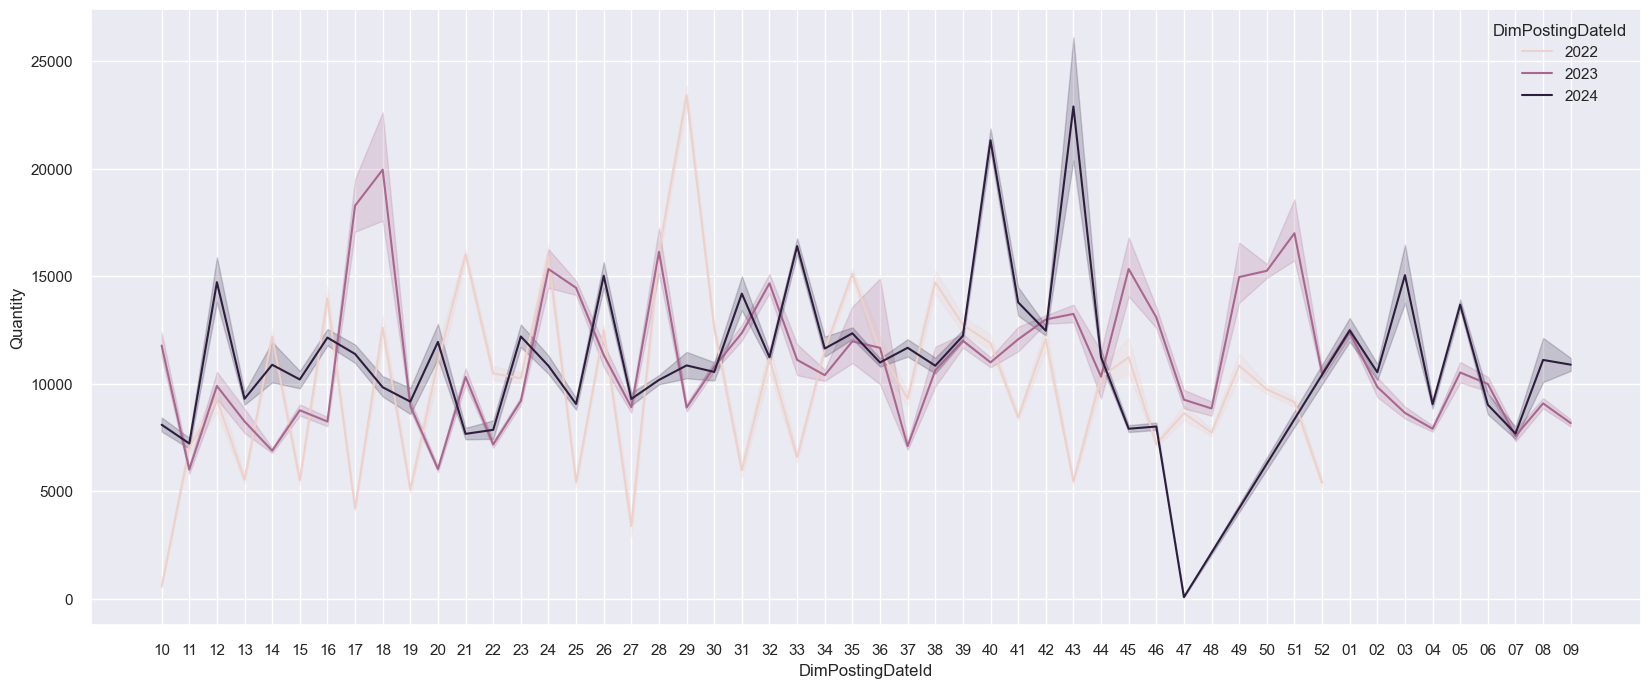

In [ ]:
sns.set(rc={'figure.figsize': (20,8)})
ax = sns.lineplot(data=df_sales,y="Quantity", x=df_sales.index.strftime("%W"),estimator="sum", hue=df_sales.index.year)
ax.tick_params(axis="x", rotation=0)

#### Product categories

In [ ]:
unique_product_cat = df_sales[['Category','SUB Category','SUB Category2']].drop_duplicates()
unique_product_cat.sort_values(by=['Category', 'SUB Category', 'SUB Category2']).reset_index(drop=True)

,Category,SUB Category,SUB Category2
0,Accessories,Accessories,Default
1,Bags,Tote,Default
2,Blazers,Blazers,Default
3,Blazers,Blazers,Long sleeve
4,Dresses,Maxi,Default
5,Dresses,Maxi,Long sleeve
6,Dresses,Maxi,Sleeveless
7,Dresses,Midi,Default
8,Dresses,Midi,Long sleeve
9,Dresses,Midi,Sleeveless


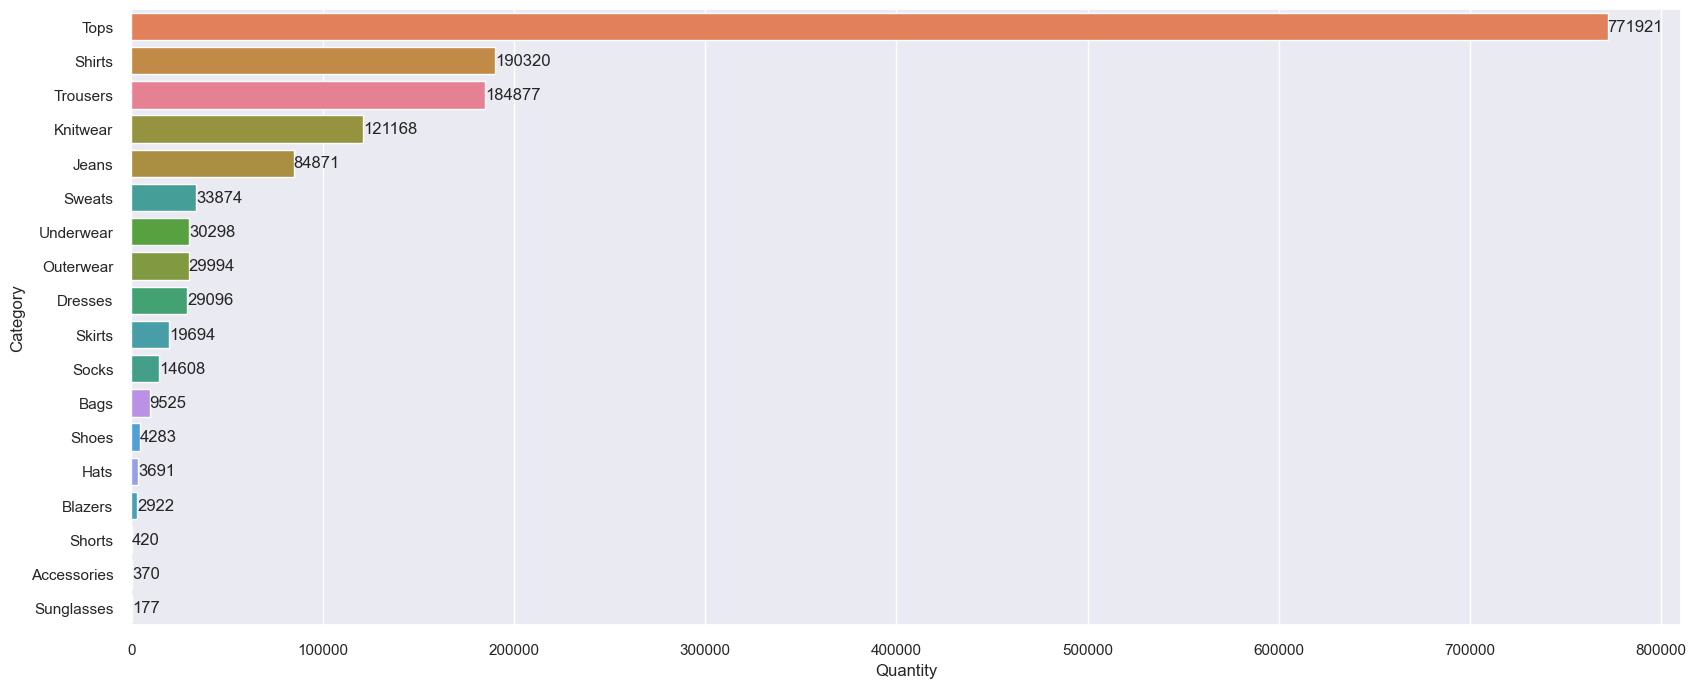

In [ ]:
# Bar plot of quantity sold for each categories
temp = df_sales.groupby(["Category"])["Quantity"].sum().sort_values(ascending=False)
ax = sns.barplot(data=df_sales, y="Category", x="Quantity", estimator="sum", hue="Category", errorbar=None, order=temp.index)
for i in ax.containers:
    ax.bar_label(i,)

#### Sales Distribution in Each Category

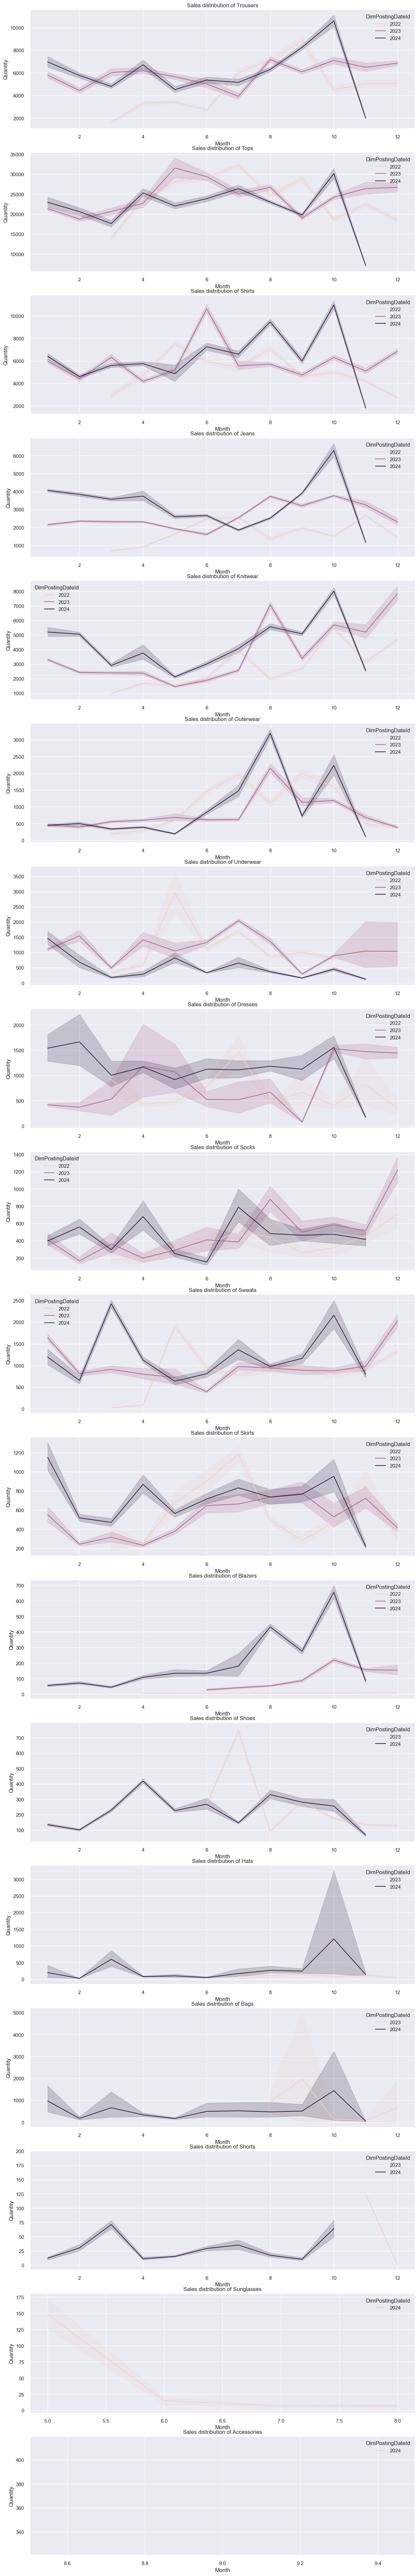

In [ ]:
fig, axs = plt.subplots(nrows=df_sales["Category"].nunique(), figsize=(15,100))
j=0
for i in df_sales["Category"].unique():
    temp = df_sales[df_sales["Category"]==i]
    sns.lineplot(data=temp, y="Quantity", x=temp.index.month, estimator="sum", hue=temp.index.year, ax=axs[j]).set(title=f"Sales distribution of {i}", xlabel="Month")
    j+=1